<a href="https://colab.research.google.com/github/markustoivonen/AIHealthTech2020/blob/master/exercises/ex9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1
Separable convolution means that we can factor our filter kernel into smaller parts, which allows us to do same operations but with less computations.

When we use the spatially separated version of the 3x3 kernel, we calculate 6 computations instead of 9 in one convolution, which means we reduce the amount of computations by a factor of 1.5. 

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras import datasets, layers, models

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 32)        3488      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
Total params: 95,840
Trainable params: 95,840
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = models.Sequential()
model.add(layers.SeparableConv2D(32, (6, 6), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_10 (Separab (None, 27, 27, 32)        236       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
separable_conv2d_11 (Separab (None, 11, 11, 64)        2400      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
separable_conv2d_12 (Separab (None, 3, 3, 128)         8896      
Total params: 11,532
Trainable params: 11,532
Non-trainable params: 0
_________________________________________________________________


We can see that the amount of parameters is roughly 10 times more for the "normal" model when compared to the model with separable convolution operators.

Pruning and quantization are methods to decrease the size of deep learning models and the amount of computations required when training and using them.

Pruning can for example be setting individual weights to zero, thus eliminating connections betweed nodes or removing whole nodes from the network. Pruning uses some type of metric to determine which weights are important and which not (for example L1 or L2 norm). 

In quantization we transform for example float16 numbers to int8 numbers, and then compute calculations. This reduces the computational compelxity of the calculations, reduces the time it takes to train a network for example. The tradeoff is that we lose information in quantization, so the performance of the model will most likely suffer.


## 2

Adversarial example is a data point in our dataset, the sole purpose of which is to fool our neural network to missclassify something that it normally would not misclassify. The adverserial example are recognized by humans, but something that the network will fail to recognize. 

In the FGSM method we add the noise whose direction is the same as the gradient of the loss function with respect to the data. The noise depends on epsilon, which is usually constrained to be a small number in relation to the actual sample values. The magnitude of gradient does not matter in this formula, but rather the direction.


In [68]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

<class 'numpy.ndarray'>


In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.6383 - accuracy: 0.3959 - val_loss: 1.3767 - val_accuracy: 0.4993
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.3083 - accuracy: 0.5290 - val_loss: 1.2414 - val_accuracy: 0.5571
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1444 - accuracy: 0.5937 - val_loss: 1.1754 - val_accuracy: 0.5924
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0346 - accuracy: 0.6357 - val_loss: 1.0835 - val_accuracy: 0.6187
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9529 - accuracy: 0.6650 - val_loss: 1.0492 - val_accuracy: 0.6377
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8819 - accuracy: 0.6888 - val_loss: 1.0419 - val_accuracy: 0.6382
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8214 - accuracy: 0.7104 - val_loss: 1.0348 -

In [106]:
# This function does not work :(
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
def create_adversarial_pattern(model, input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    logits = model.predict(input_image)
    loss = loss_object(input_label, logits)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad


def get_new_prediction(model, input_image, input_label, epsilon=0.005):
  # I could not get the create_adversarial_pattern to work with my own dataset & method, so
  # I had to result to random noise generated with numpy.
  # The first two lines of the function would have used the FGSM
  # if you can figure our why it does not work, it would be nice to know just as a curioisity

  # perb = create_adversarial_pattern(model, input_image, input_label)
  # input_image_adverserial = input_image + epsilon*perb
  
  # Add random noise
  input_image_adverserial = input_image + np.random.uniform(size=(1,32,32,3))
  logits = model.predict(input_image_adverserial)
  prediction = np.argmax(np.array(tf.nn.softmax(logits)).flatten())
  return prediction

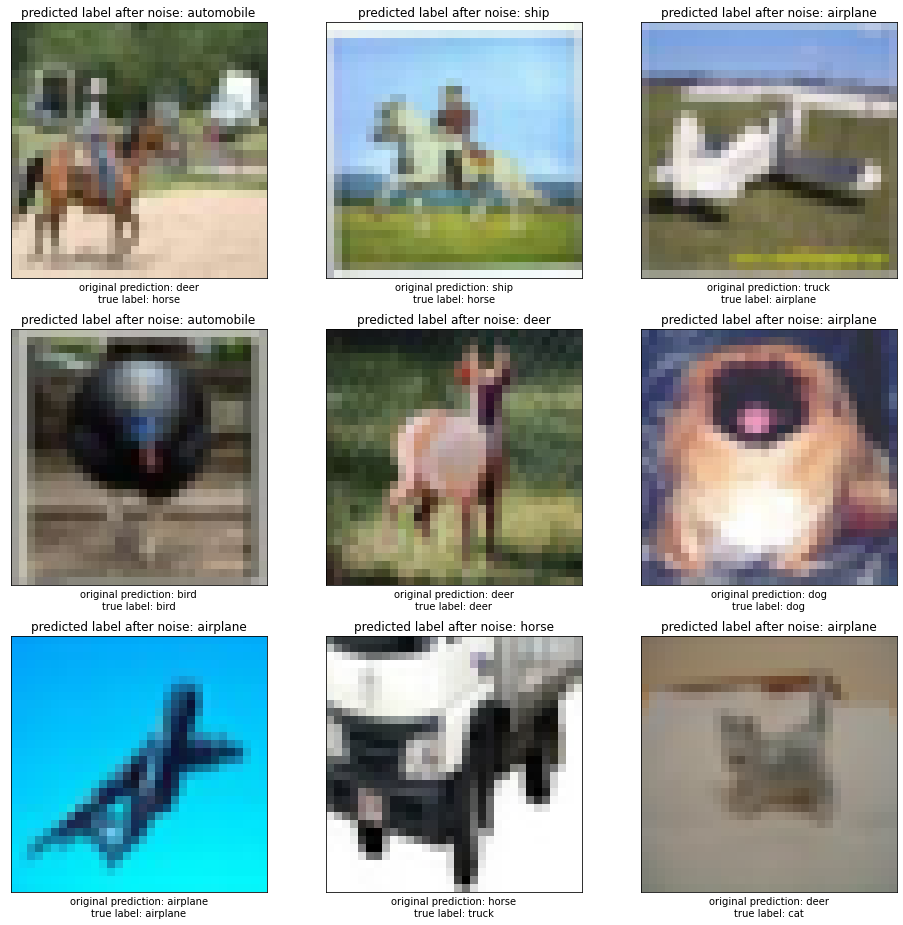

In [125]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
IMG_AMOUNT = 9
indices = np.random.choice(len(test_labels), IMG_AMOUNT)
plt.figure(figsize=(16,16))
for i, img_idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    input_image = test_images[img_idx].reshape([-1, 32,32,3])
    input_label = test_labels[img_idx][0]
    predicted_label = get_new_prediction(model, tf.convert_to_tensor(input_image), input_label)
    plt.title("predicted label after noise: " + str(class_names[predicted_label]))
    plt.imshow(test_images[img_idx], cmap=plt.cm.binary)
    original_logits = model.predict(input_image)
    original_prediction = np.argmax(np.array(tf.nn.softmax(original_logits)).flatten())
    plt.xlabel("original prediction: " + class_names[original_prediction] + "\ntrue label: "+ str(class_names[test_labels[img_idx][0]]))
plt.show()
